In [1]:
# Study with https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations
%matplotlib inline

import pandas as pd
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid", color_codes=True)

In [2]:
df = pd.read_csv('../data/iris.csv')
del df['Id']
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Count by values
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

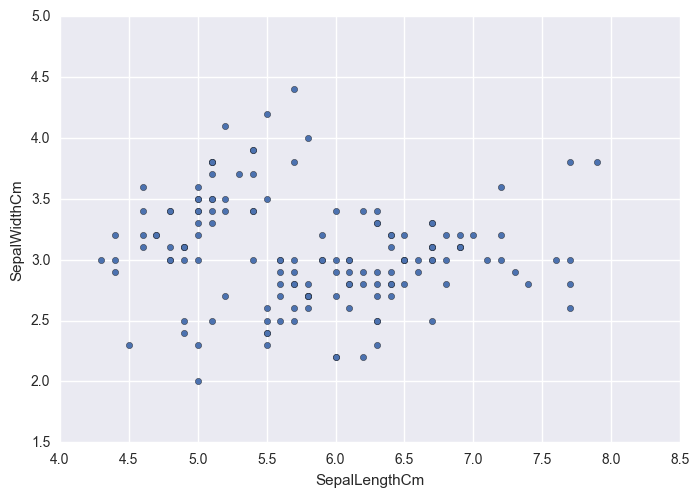

In [4]:
# Let's plot this with 
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

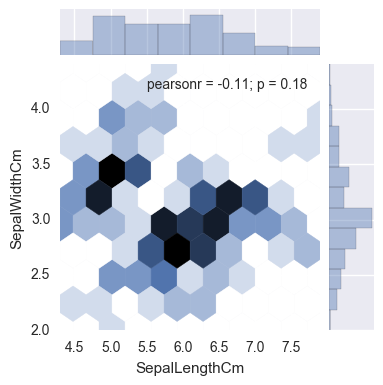

In [5]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=4, kind="hex")

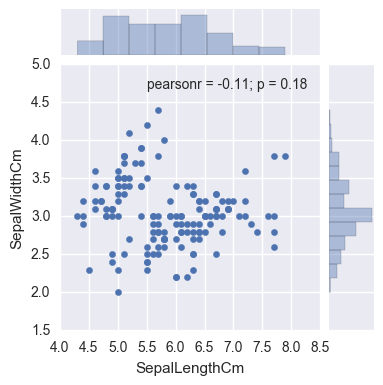

In [6]:
# Well, hex version looks not that good... Get rid of that param
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=4)

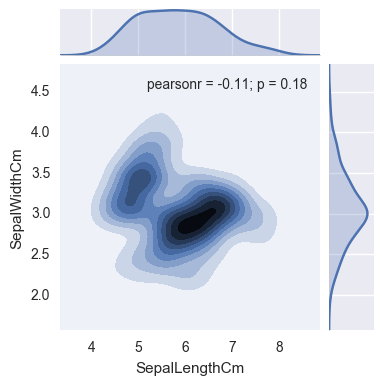

In [7]:
# Try kde... Not good either
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=4, kind="kde")

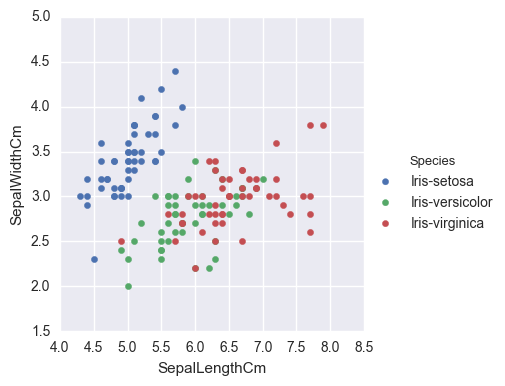

In [8]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species", size=4) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

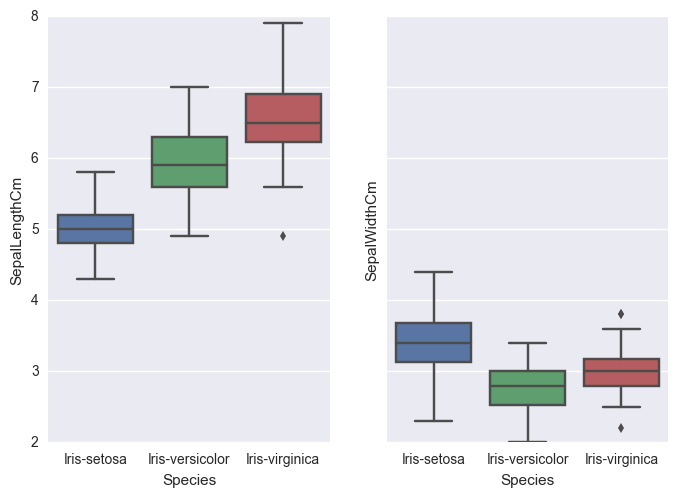

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="SepalLengthCm", data=df, ax=ax1)
sns.boxplot(x="Species", y="SepalWidthCm", data=df, ax=ax2)

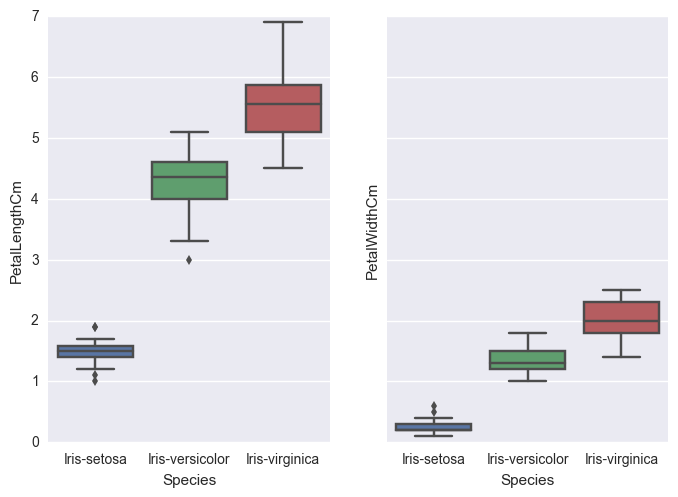

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=df, ax=ax1)
sns.boxplot(x="Species", y="PetalWidthCm", data=df, ax=ax2)

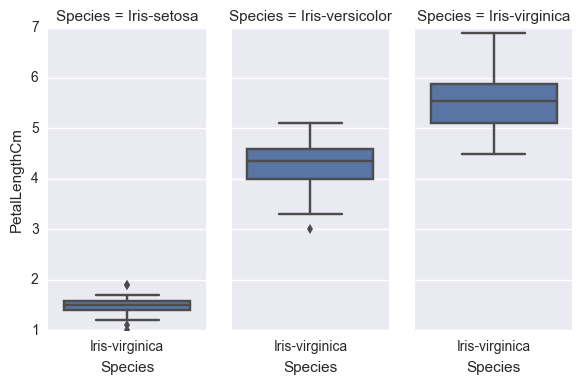

In [11]:
sns.FacetGrid(df, col="Species", size=4, aspect=.5) \
   .map(sns.boxplot, "Species", "PetalLengthCm")

In [12]:
cm = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

mask = -mask
mask

array([[False, False, False, False],
       [ True, False, False, False],
       [ True,  True, False, False],
       [ True,  True,  True, False]], dtype=bool)

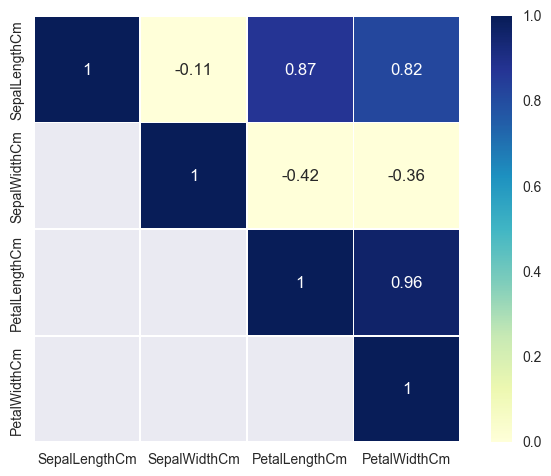

In [13]:
# Well, it's not necessarily useful but let's see the correlation btw features
sns.heatmap(cm, annot=True, mask=mask, vmin=0, vmax=1, linewidths=.5, cmap='YlGnBu', square=True)

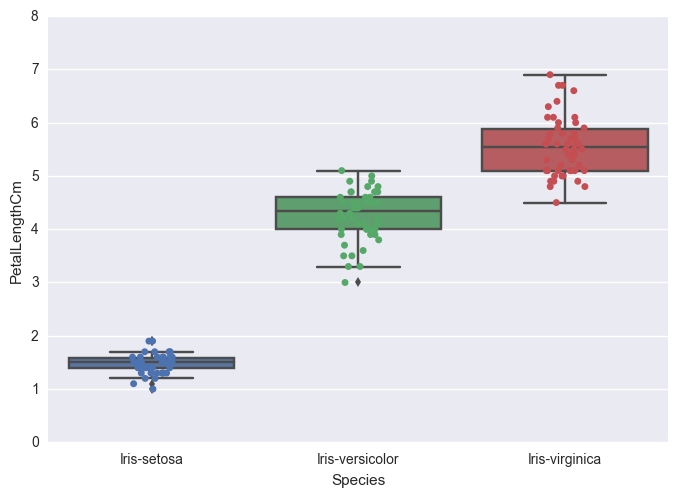

In [14]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=df)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

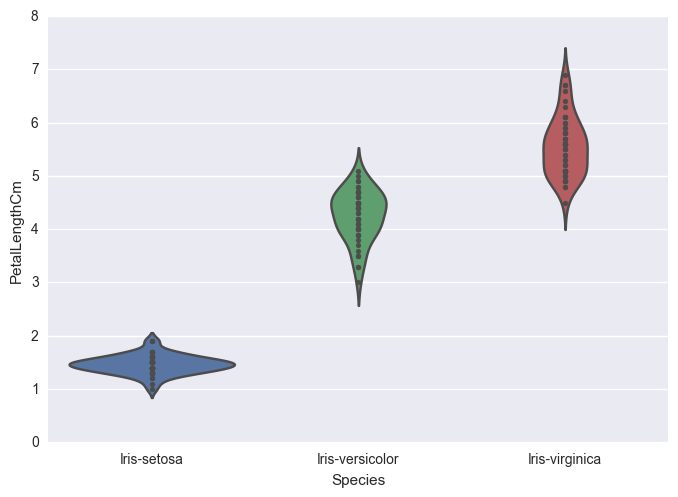

In [15]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=2, inner="point")

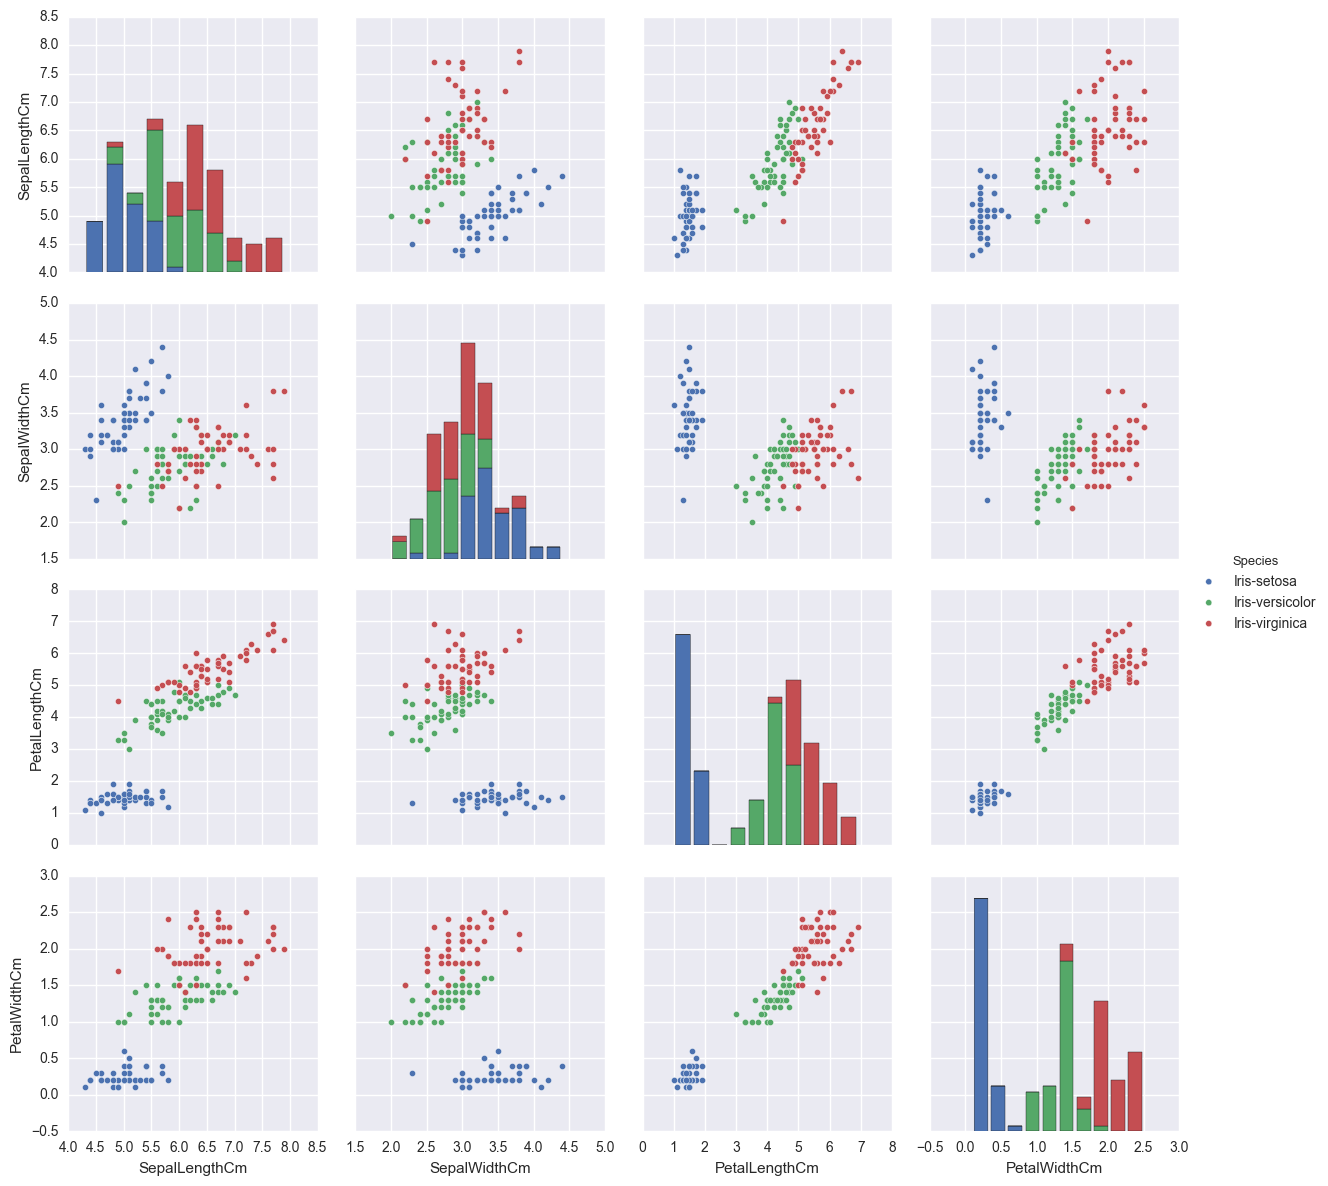

In [16]:
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(df, hue="Species", size=3)